In [40]:
import numpy as np
from pylab import *
%matplotlib inline

# GTEST - A cheeky little gaussianity test
Designed in Keith's orange notebook during his visit to Steve's house at Kingscliff in April 2018.

The electric field is Gaussian distributed:
$X_i \sim N(0, \sigma^2)$

Then,
$X_i^2/\sigma_i^2 \sim \chi^2(1) = \Gamma(1/2, 2)$

The Sum of all those squared Gaussians for 'detected' sample is:

$\theta$

$\sum_{i=1}^{n} X_i^2 = \sum \Gamma(1/2, 2\sigma^2) = \Gamma(k=n/2, \theta=2 \sigma^2)$

... Rest of proof and

$\frac{Var[X]}{E^2[X]} = 2/n$ 

Where $n$ is the number of samples (including 2x if it's compelx). If it's gaussian.



In [65]:
Nsamp_per_int = 1024
Nint_per_block = 256
Nblock = 128
shape = (Nblock, Nint_per_block, Nsamp_per_int)
v = (np.random.randn(*shape) + 1j*np.random.randn(*shape))*4
vdet =(abs(v)**2).sum(axis=2)
vdet.shape

(128, 256)

(array([2.1000e+01, 3.2100e+02, 2.0570e+03, 6.7270e+03, 1.0562e+04,
        8.4960e+03, 3.7060e+03, 7.6900e+02, 1.0400e+02, 5.0000e+00]),
 array([28691.18099149, 29555.60252678, 30420.02406208, 31284.44559738,
        32148.86713267, 33013.28866797, 33877.71020327, 34742.13173856,
        35606.55327386, 36470.97480916, 37335.39634445]),
 <a list of 10 Patch objects>)

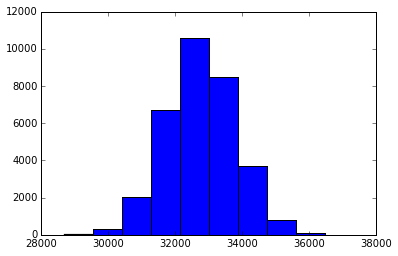

In [66]:
hist(vdet.flatten())


In [67]:
gtest = (vdet.mean(axis=1)**2/vdet.var(axis=1))/float(Nsamp_per_int) - 1

0.007383301934227746 0.08386865290677259 0.27406860165268676 -0.19243766720961752


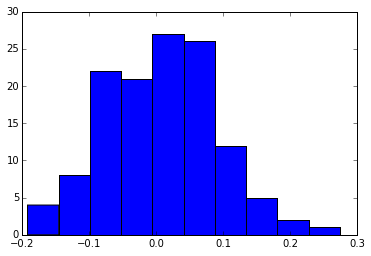

In [68]:
hist(gtest)
print gtest.mean(), gtest.std(), gtest.max(), gtest.min()

In [69]:
gtest 

array([-0.09759245, -0.13819956, -0.05612159, -0.014555  ,  0.21692022,
        0.02707339, -0.06945077, -0.09113191, -0.06818295, -0.02398407,
       -0.03154189,  0.01247125,  0.03024933,  0.06882301,  0.00275066,
       -0.03241743, -0.036652  ,  0.10829834,  0.10931388, -0.06104269,
        0.01450321,  0.10420025, -0.11324399, -0.02461853,  0.08453091,
        0.01291768, -0.06688005,  0.05295178,  0.06268984, -0.02939606,
       -0.09033508, -0.15908422,  0.08518689, -0.07227442,  0.05006735,
        0.08090847, -0.02017048, -0.02520384, -0.02483367, -0.00571163,
       -0.137232  ,  0.16766082,  0.0583502 , -0.02285314,  0.06845291,
        0.03478327,  0.13611593, -0.01176841,  0.05513467, -0.12122324,
        0.01016008, -0.03265892,  0.09042757,  0.0570836 , -0.06201197,
        0.06803585,  0.06186952,  0.08327792,  0.07191954, -0.02198982,
        0.11028791,  0.14716441,  0.05365338, -0.01633979, -0.07549246,
       -0.06724382, -0.18553099, -0.11372379,  0.06307979,  0.07

1.747300221177639e-15 1.001685351601185


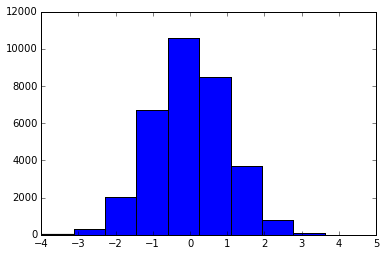

In [84]:
vdetf = vdet.flatten()
rescale = (vdetf/vdetf.mean() - 1)*np.sqrt(Nsamp_per_int)
hist(rescale)
print rescale.mean(), rescale.std()